## Data Wrangling Project

### Introduction

This project is all about Data wrangling , which consits of
>Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

>Assessing data

>Cleaning data

In this Project we are going to Wrangle WeRateDogs Twitter data to analyze and make visulisation. but our main Aim is to Wrangling the WeRateDogs Data..We gather the Data from different Resources and just like twitter data comes in jason format. we have to convert it into pandas dataframe .Reading the tsv files and then convert it into Pandas dataframe. So the project is really interesting.

### Gather

In [4]:
#importing important Packages

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from tweepy import OAuthHandler

from timeit import default_timer as timer

In [5]:
#Reading Csv files
twitter_archieve = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
#Display 

twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# taking info of twitter archieve data ..

twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# Use requests library to download tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Reading TSV file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
#use info method 

image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
tweet_ids = twitter_archieve.tweet_id.values
len(tweet_ids)

2356

In [12]:
# Making a empty List to calculate the error tweets
error_list = []
# making a empy List to calculate no. of tweets
df_list = []
# Calculate the time of execution
start = time.time()

# This For loop will add each available tweet to df_list

for tweet_id in twitter_archieve['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count']
        date_time = tweet['created_at'] 
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
# Calculate the time of excution
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
859924526012018688 _ Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=859924526012018688&tweet_mode=extended (Caused by SSLError(SSLError("bad handshake: SysCallError(10054, 'WSAECONNRESET')")))
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with 

In [13]:
# Now we check the no. of errors we g0t
len(error_list)

28

In [14]:
# Now we check the no. of succesfull result we got
len(df_list)

2328

In [17]:
# Now we create a datafrmae using above dictionaries 
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

In [18]:
#Now after creating dataframe we save our dataframe in txt file

tweets.to_csv('tweet_jason.txt', encoding = 'utf-8', index = False)

In [19]:
# Now we create a pandas dataframe from saved file tweet_jason.txt
tweets_data = pd.read_csv('tweet_jason.txt', encoding = 'utf-8')
#Displaying Data
tweets_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36297,7725,8773706,146001,2017-08-01 16:23:56+00:00
1,892177421306343426,31301,5718,8773706,146001,2017-08-01 00:17:27+00:00
2,891815181378084864,23570,3786,8773706,146001,2017-07-31 00:18:03+00:00
3,891689557279858688,39598,7888,8773706,146001,2017-07-30 15:58:51+00:00
4,891327558926688256,37812,8506,8773706,146001,2017-07-29 16:00:24+00:00
5,891087950875897856,19046,2851,8773706,146001,2017-07-29 00:08:17+00:00
6,890971913173991426,11093,1855,8773705,146001,2017-07-28 16:27:12+00:00
7,890729181411237888,61165,17242,8773706,146001,2017-07-28 00:22:40+00:00
8,890609185150312448,26200,3924,8773705,146001,2017-07-27 16:25:51+00:00
9,890240255349198849,29949,6718,8773706,146001,2017-07-26 15:59:51+00:00


In [20]:
# Now take the info of data using info() method
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 6 columns):
tweet_id           2328 non-null int64
favorites          2328 non-null int64
retweets           2328 non-null int64
user_followers     2328 non-null int64
user_favourites    2328 non-null int64
date_time          2328 non-null object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


#### After Gathering Data now we Move to Acessing Part

### Accessing

### Visual Assesment

In [21]:
twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
tweets_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36297,7725,8773706,146001,2017-08-01 16:23:56+00:00
1,892177421306343426,31301,5718,8773706,146001,2017-08-01 00:17:27+00:00
2,891815181378084864,23570,3786,8773706,146001,2017-07-31 00:18:03+00:00
3,891689557279858688,39598,7888,8773706,146001,2017-07-30 15:58:51+00:00
4,891327558926688256,37812,8506,8773706,146001,2017-07-29 16:00:24+00:00
5,891087950875897856,19046,2851,8773706,146001,2017-07-29 00:08:17+00:00
6,890971913173991426,11093,1855,8773705,146001,2017-07-28 16:27:12+00:00
7,890729181411237888,61165,17242,8773706,146001,2017-07-28 00:22:40+00:00
8,890609185150312448,26200,3924,8773705,146001,2017-07-27 16:25:51+00:00
9,890240255349198849,29949,6718,8773706,146001,2017-07-26 15:59:51+00:00


### Assesing programitically

In [25]:
# take information of data types missing enteries 
twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
# show some statistical value

twitter_archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
#count the value of numerator 
twitter_archieve['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
# count the value of denominator
twitter_archieve['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [33]:
# count the value of Names

twitter_archieve['name'].value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
Toby             7
Bailey           7
Daisy            7
an               7
Buddy            7
Scout            6
Rusty            6
Dave             6
Bella            6
Jax              6
Koda             6
Jack             6
Milo             6
Stanley          6
Oscar            6
Leo              6
Alfie            5
              ... 
Blipson          1
Kellogg          1
Kevon            1
Wiggles          1
Philippe         1
Laika            1
Huxley           1
Craig            1
Mary             1
Geoff            1
Moofasa          1
Caryl            1
Walker           1
Ridley           1
Snoopy           1
Buckley          1
Schnozz          1
Stephanus        1
Jo               1
old              1
Rooney           1
Finnegus    

In [35]:
# Now taking the info of image prediction data set 

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Count the number of jpg_url

image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                       

In [38]:
# Now we calculate number of entries for each source

twitter_archieve.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
# Name which is unusual

twitter_archieve[twitter_archieve['name'].apply(len)<3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [41]:
# Now display the original tweets
twitter_archieve[twitter_archieve['retweeted_status_id'].isnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [42]:
tweets_data.sample(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2290,666454714377183233,491,199,8773553,146000,2015-11-17 03:16:00+00:00
2039,671141549288370177,1114,630,8773551,146000,2015-11-30 01:39:49+00:00
711,781524693396357120,21118,5675,8773718,146000,2016-09-29 16:03:01+00:00
281,837482249356513284,3857,443,8773705,146000,2017-03-03 01:58:22+00:00
2091,670417414769758208,553,309,8773551,146000,2015-11-28 01:42:22+00:00
789,771136648247640064,9269,2972,8773721,146000,2016-09-01 00:04:38+00:00
1632,683098815881154561,2158,658,8773547,146000,2016-01-02 01:33:43+00:00
218,848213670039564288,8093,721,8773706,146000,2017-04-01 16:41:12+00:00
347,829449946868879360,10557,2045,8773710,146000,2017-02-08 22:00:52+00:00
1320,704364645503647744,7995,3542,8773725,146000,2016-02-29 17:56:32+00:00


In [43]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
152,668645506898350081,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1,ski_mask,0.302854,False,knee_pad,0.096881,False,balance_beam,0.084076,False
802,691459709405118465,https://pbs.twimg.com/media/CZiO7mWUEAAa4zo.jpg,1,Shetland_sheepdog,0.551206,True,collie,0.232544,True,Border_collie,0.095218,True
1778,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,1,Weimaraner,0.133033,True,Chesapeake_Bay_retriever,0.092227,True,American_Staffordshire_terrier,0.065094,True
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
316,671743150407421952,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,0.104193,False
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False


## Quality and tideness issues found by visual and programatical assesment 

There are two main issues:
 - Quality 

 - Tideness


### Quality has four main dimension 
 - Completeness
 - validity
 - Accuracy
 - Consistency

#### Twiiter_archieve  dataset

 -  The columns n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers or strings instead of float.
 
 
 - The columns retweeted_status_timestamp, timestamp should be datetime instead of object (string).
 
 
 - The numerator and denominator columns have invalid values.
 
 
 - In several columns null objects are non-null (None to NaN).
 
 
 - Some of the name in name column is invalid  i.e 'None', 'a', 'an' and less than 3 characters.
 
 
 - As per the requirement we only want original ratings no retweets we want that have images.
 
 
 - We may have to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,      retweeted_status_user_id and tweet_id) to string because we don't want any operations on them.
 
 
 - Sources difficult to read.
 
 
 #### Image_predictions dataset
 
 
 
 - Some column have missing values 
 
 - Same jpg_url for some tweet_ids
 
 - Dataset contain retweets
 
 
 
 #### Tweets_data dataset
 
 
 
 - keep original tweets and unique id.

### Tideness 

- join tweets_data and image predictions data to twitter archieved data

- Dog stage variable in four different columns

- No need to store all information in image dataset 

## Cleaning Process

In [59]:
# Before cleaning we have to copy our original dataframe.

twitter_archive_copy = twitter_archieve.copy()
tweets_data_copy = tweets_data.copy()
image_predictions_copy = image_predictions.copy()

**Define**

join tweets_data and image predictions data to twitter archieved data

**Code**

In [60]:
# join dataframes twitter_archieve_copy and tweets_data_copy

twitter_archive_copy = pd.merge(left=twitter_archive_copy,
                                 right=tweets_data_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

In [61]:
# Now join twitter_archieve_copy and image_predictions_copy


twitter_archive_copy = twitter_archive_copy.merge(image_predictions_copy, on='tweet_id', how='inner')

**Test**

In [62]:
# now see the colums of merged data frame 
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 33 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
favorites                     2057 

**Define**

Now melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

**Code**

In [66]:
#Now we melt the columns into single colum ysing melt in python
Columns_Melt= ['doggo', 'floofer', 'pupper', 'puppo']
Columns_Stay = [x for x in twitter_archive_copy.columns.tolist() if x not in Columns_Melt]


# Melt the the columns into values
twitter_archive_copy = pd.melt(twitter_archive_copy, id_vars = Columns_Stay, value_vars = Columns_Melt, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_copy = twitter_archive_copy.drop('stages', 1)

**Test** 

In [64]:
twitter_archive_copy['dog_stage'].value_counts()


None       7897
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [67]:
print(len(twitter_archive_copy))

8228


**Define**

Now delete the retweets

**Code**

In [68]:
# Delete the retweets
twitter_archive_copy = twitter_archive_copy[pd.isnull(twitter_archive_copy.retweeted_status_id)]

**Define**

Now delete duplicate tweet id's

**Code**

In [70]:
# Delete duplicated tweet_id
twitter_archive_copy = twitter_archive_copy.drop_duplicates()

**Define**

Now delete duplicate tweet id's

**Code**

In [72]:
# Delete tweets with no pictures

twitter_archive_copy = twitter_archive_copy.dropna(subset = ['jpg_url'])

**Final test of above Code**

In [73]:
len(twitter_archive_copy)

2301

We can clearly see that our length of Data set is reduced now

**Define**

Now we delete column related to retweets we don't need those columns now

**Code**

In [75]:
twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_id', 1)
twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_user_id', 1)
twitter_archive_copy = twitter_archive_copy.drop('retweeted_status_timestamp', 1)

**Define**

Delete column date_time we imported from the twitter API, it has the same values as timestamp column

**Code**

In [77]:
twitter_archive_copy = twitter_archive_copy.drop('date_time', 1)

**Test for above codes**

In [79]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 7045
Data columns (total 26 columns):
tweet_id                 2301 non-null int64
in_reply_to_status_id    27 non-null float64
in_reply_to_user_id      27 non-null float64
timestamp                2301 non-null object
source                   2301 non-null object
text                     2301 non-null object
expanded_urls            2301 non-null object
rating_numerator         2301 non-null int64
rating_denominator       2301 non-null int64
name                     2301 non-null object
favorites                2301 non-null int64
retweets                 2301 non-null int64
user_followers           2301 non-null int64
user_favourites          2301 non-null int64
jpg_url                  2301 non-null object
img_num                  2301 non-null int64
p1                       2301 non-null object
p1_conf                  2301 non-null float64
p1_dog                   2301 non-null bool
p2                       2301 

**Define**

Delete dog stage duplicates 

**Code**

In [81]:
#Delete dog_stage duplicates

twitter_archive_copy = twitter_archive_copy.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

**Test**

In [82]:
twitter_archive_copy['dog_stage'].value_counts()

None       1680
pupper      212
doggo        62
puppo        23
floofer       8
Name: dog_stage, dtype: int64

**Define**

 image predictions columns solution

**Code**

In [84]:

prediction_algorithm = []
confidence_level = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

twitter_archive_copy.apply(get_prediction_confidence, axis=1)
twitter_archive_copy['prediction_algorithm'] = prediction_algorithm
twitter_archive_copy['confidence_level'] = confidence_level

**Test**

In [86]:
# the two new columns 'prediction algorithm' and 'confidence level' should be added in dataframe  
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 28 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1985 non-null object
favorites                1985 non-null int64
retweets                 1985 non-null int64
user_followers           1985 non-null int64
user_favourites          1985 non-null int64
jpg_url                  1985 non-null object
img_num                  1985 non-null int64
p1                       1985 non-null object
p1_conf                  1985 non-null float64
p1_dog                   1985 non-null bool
p2                       1985 

**Define**

 Remove unused column 

**Code**

In [87]:
# Now we can easily delete the remaing columns 

twitter_archive_copy = twitter_archive_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

**Test**

In [91]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 18 columns):
tweet_id                 1985 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1985 non-null object
source                   1985 non-null object
text                     1985 non-null object
expanded_urls            1985 non-null object
rating_numerator         1985 non-null int64
rating_denominator       1985 non-null int64
name                     1985 non-null object
favorites                1985 non-null int64
retweets                 1985 non-null int64
user_followers           1985 non-null int64
user_favourites          1985 non-null int64
jpg_url                  1985 non-null object
dog_stage                1985 non-null object
prediction_algorithm     1985 non-null object
confidence_level         1985 non-null float64
dtypes: float64(3), int64(7), object(8)
memory usage: 294.6+ KB


We can clearly see unused column is removed now

In [92]:
#Some other unsued column we have to drop

twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

In [93]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 15 columns):
tweet_id                1985 non-null int64
timestamp               1985 non-null object
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null int64
rating_denominator      1985 non-null int64
name                    1985 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null object
prediction_algorithm    1985 non-null object
confidence_level        1985 non-null float64
dtypes: float64(1), int64(6), object(8)
memory usage: 248.1+ KB


**Define**

 convert timestamp data type object to date-time  

**Code**

In [94]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

**Test**

In [95]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 15 columns):
tweet_id                1985 non-null int64
timestamp               1985 non-null datetime64[ns, UTC]
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null int64
rating_denominator      1985 non-null int64
name                    1985 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null object
prediction_algorithm    1985 non-null object
confidence_level        1985 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(7)
memory usage: 248.1+ KB


In [96]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,36297,7725,8773706,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000
1451,679862121895714818,2015-12-24 03:12:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman I'm jus trynna lik the fler"" 11...",https://twitter.com/dog_rates/status/679862121...,11,10,None,2446,617,8774371,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,None,EntleBucher,0.523206
1450,679877062409191424,2015-12-24 04:11:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,1984,645,8773547,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000
1449,680070545539371008,2015-12-24 17:00:27+00:00,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,2573,866,8773547,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811
1448,680085611152338944,2015-12-24 18:00:19+00:00,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,12767,8949,8773547,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000


**Define**

 Covert Null values to None Types 

**Code**

In [98]:
twitter_archive_copy.loc[twitter_archive_copy['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
twitter_archive_copy.loc[twitter_archive_copy['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

C:\anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


**Test**

In [99]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 15 columns):
tweet_id                1985 non-null int64
timestamp               1985 non-null datetime64[ns, UTC]
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null int64
rating_denominator      1985 non-null int64
name                    1985 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null object
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(6), object(7)
memory usage: 248.1+ KB


**Define**

 Change remaining Data types 

**Code**

In [102]:
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)
twitter_archive_copy['favorites'] = twitter_archive_copy['favorites'].astype(int)
twitter_archive_copy['retweets'] = twitter_archive_copy['retweets'].astype(int)
twitter_archive_copy['user_followers'] = twitter_archive_copy['user_followers'].astype(int)
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].astype('category')
twitter_archive_copy['rating_numerator'] = twitter_archive_copy['rating_numerator'].astype(float)
twitter_archive_copy['rating_denominator'] = twitter_archive_copy['rating_denominator'].astype(float)


**Test**

In [103]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 15 columns):
tweet_id                1985 non-null object
timestamp               1985 non-null datetime64[ns, UTC]
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null float64
rating_denominator      1985 non-null float64
name                    1985 non-null object
favorites               1985 non-null int32
retweets                1985 non-null int32
user_followers          1985 non-null int32
jpg_url                 1985 non-null object
dog_stage               1985 non-null category
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dtypes: category(1), datetime64[ns, UTC](1), float64(3), int32(3), object(7)
memory usage: 211.5+ KB


**Define**

 Inaccurate ratings , Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10.

**Code**

In [104]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter_archive_copy['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

In [105]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[1436, 546, 40, 4715]

In [106]:
#Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter_archive_copy.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter_archive_copy.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter_archive_copy.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter_archive_copy.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

**Test**

In [107]:
# Check contents of row with index 546 to ensure the rating is corrected
twitter_archive_copy.loc[546]

tweet_id                                               786709082849828864
timestamp                                       2016-10-13 23:23:56+00:00
source                  <a href="http://twitter.com/download/iphone" r...
text                    This is Logan, the Chow who lived. He solemnly...
expanded_urls           https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                     9.75
rating_denominator                                                     10
name                                                                Logan
favorites                                                           18640
retweets                                                             6251
user_followers                                                    8773717
jpg_url                   https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
dog_stage                                                            None
prediction_algorithm                  

**Define**

 Find gender of dog from text column

**Code**

In [108]:

# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_archive_copy['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_archive_copy['dog_gender'] = dog_gender

In [109]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,36297,7725,8773706,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,None,0.000000,NaN
1451,679862121895714818,2015-12-24 03:12:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman I'm jus trynna lik the fler"" 11...",https://twitter.com/dog_rates/status/679862121...,11.0,10.0,None,2446,617,8774371,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,None,EntleBucher,0.523206,NaN
1450,679877062409191424,2015-12-24 04:11:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,1984,645,8773547,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,None,0.000000,NaN
1449,680070545539371008,2015-12-24 17:00:27+00:00,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2573,866,8773547,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
1448,680085611152338944,2015-12-24 18:00:19+00:00,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,12767,8949,8773547,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,None,0.000000,NaN


In [111]:
print("dog_gender count \n", twitter_archive_copy.dog_gender.value_counts())

dog_gender count 
 NaN       1130
male       632
female     223
Name: dog_gender, dtype: int64


In [112]:
#covert null values to nan 
twitter_archive_copy.loc[twitter_archive_copy['dog_gender'] == 'NaN', 'dog_gender'] = None

In [114]:
# Set dog gender datatype as category

twitter_archive_copy['dog_gender'] = twitter_archive_copy['dog_gender'].astype('category')

**Test**

In [117]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 7045
Data columns (total 16 columns):
tweet_id                1985 non-null object
timestamp               1985 non-null datetime64[ns, UTC]
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null float64
rating_denominator      1985 non-null float64
name                    1985 non-null object
favorites               1985 non-null int32
retweets                1985 non-null int32
user_followers          1985 non-null int32
jpg_url                 1985 non-null object
dog_stage               1985 non-null category
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dog_gender              855 non-null category
dtypes: category(2), datetime64[ns, UTC](1), float64(3), int32(3), object(7)
memory usage: 293.5+ KB


In [118]:
twitter_archive_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
976,718246886998687744,2016-04-08 01:19:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3.0,10.0,Alexanderson,1912,500,8773722,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,None,Chihuahua,0.354488,NaN
1370,684122891630342144,2016-01-04 21:23:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,11.0,10.0,None,2009,466,8773546,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,None,None,0.000000,NaN
464,799063482566066176,2016-11-17 01:35:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,https://twitter.com/dog_rates/status/799063482...,11.0,10.0,Mister,8260,2524,8773716,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,None,Norfolk_terrier,0.334436,male
1661,673636718965334016,2015-12-06 22:54:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10.0,10.0,a,1072,345,8773551,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,None,pug,0.019044,NaN
1297,688828561667567616,2016-01-17 21:01:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,https://twitter.com/dog_rates/status/688828561...,9.0,10.0,Brad,1380,370,8773546,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,None,Cardigan,0.614231,NaN
1735,671855973984772097,2015-12-02 00:58:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,https://twitter.com/dog_rates/status/671855973...,8.0,10.0,None,871,418,8773550,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,None,None,0.000000,NaN
409,809920764300447744,2016-12-17 00:38:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",https://twitter.com/dog_rates/status/809920764...,10.0,10.0,None,15863,4035,8773716,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,None,Norwich_terrier,0.397163,NaN
1438,680440374763077632,2015-12-25 17:30:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11.0,10.0,None,1445,497,8773546,https://pbs.twimg.com/ext_tw_video_thumb/68044...,None,None,0.000000,NaN
1358,684594889858887680,2016-01-06 04:38:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",https://twitter.com/dog_rates/status/684594889...,10.0,10.0,None,8907,3501,8773546,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,None,Weimaraner,0.948688,NaN
1555,675853064436391936,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,80.0,None,2646,1264,8773549,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,None,Labrador_retriever,0.868367,NaN


**Define**

 Inaccurate Name , some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.
I also found an instand of a name being "O" instead of "O'Malley"

**Code**

In [119]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_archive_copy['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['by', 'officially', 'a', 'actually', 'the', 'getting', 'an', 'very', 'quite', 'light', 'space', 'just', 'incredibly', 'one', 'such', 'unacceptable', 'this', 'infuriating', 'my', 'not', 'his', 'all']


In [120]:
# Replace all names that start with a lowercase letter with a NaN
twitter_archive_copy['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter_archive_copy['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter_archive_copy['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

**Test**

In [122]:
# Check value counts to see that None and names starting with a lowercase letter are gone
twitter_archive_copy['name'].value_counts()

Cooper      10
Charlie     10
Oliver      10
Lucy         9
Penny        9
Tucker       9
Winston      8
Sadie        8
Daisy        7
Toby         7
Lola         7
Bo           6
Koda         6
Bella        6
Jax          6
Stanley      6
Leo          5
Milo         5
Scout        5
Louis        5
Rusty        5
Chester      5
Oscar        5
Dave         5
Bailey       5
Buddy        5
Chip         4
Brody        4
Larry        4
George       4
            ..
Barney       1
Theo         1
Philippe     1
Shikha       1
Hall         1
Ito          1
Margo        1
Chuck        1
Mary         1
Aubie        1
Jett         1
Kial         1
Caryl        1
Walker       1
Ridley       1
Snoopy       1
Buckley      1
Schnozz      1
Chadrick     1
Godi         1
Finnegus     1
Jessiga      1
Butters      1
Fwed         1
Sephie       1
Jessifer     1
Arlen        1
Darla        1
Laika        1
Amy          1
Name: name, Length: 909, dtype: int64

In [123]:
# Now finally we check the datatypes 

twitter_archive_copy.dtypes

tweet_id                             object
timestamp               datetime64[ns, UTC]
source                               object
text                                 object
expanded_urls                        object
rating_numerator                    float64
rating_denominator                  float64
name                                 object
favorites                             int32
retweets                              int32
user_followers                        int32
jpg_url                              object
dog_stage                          category
prediction_algorithm                 object
confidence_level                    float64
dog_gender                         category
dtype: object

### Store the cleaned dataframe to csv named as 'twitter_archive_master'

In [125]:
# Save clean DataFrame to csv file
twitter_archive_copy.drop(twitter_archive_copy.columns[twitter_archive_copy.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_copy.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [126]:
# Now check the our csv contain all data 
twitter_archive_copy = pd.read_csv('twitter_archive_master.csv')
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 16 columns):
tweet_id                1985 non-null int64
timestamp               1985 non-null object
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null float64
rating_denominator      1985 non-null float64
name                    1341 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null object
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dog_gender              855 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 248.2+ KB


#### So, Our Daframe is Successfully Store in file 

## Visualization Part


> In this part we visualize our data and find insights from the Visulize data.

In [3]:
# import important packages 

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# By Using ggplot makes simple and create complex plots from data 
matplotlib.style.use('ggplot')

Now we read the stored file named as **twitter_archive_master.csv** to visulize our data

In [5]:
# Reading Dataframe 

df = pd.read_csv('twitter_archive_master.csv')

In [6]:
# Displaying columns name and other information using info method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 16 columns):
tweet_id                1985 non-null int64
timestamp               1985 non-null object
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null float64
rating_denominator      1985 non-null float64
name                    1341 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null object
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dog_gender              855 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 248.2+ KB


In [7]:
#change data type of some columns 

df['tweet_id'] = df['tweet_id'].astype(object)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 2017-08-01 16:23:56+00:00 to 2016-06-03 01:07:16+00:00
Data columns (total 15 columns):
tweet_id                1985 non-null object
source                  1985 non-null object
text                    1985 non-null object
expanded_urls           1985 non-null object
rating_numerator        1985 non-null float64
rating_denominator      1985 non-null float64
name                    1341 non-null object
favorites               1985 non-null int64
retweets                1985 non-null int64
user_followers          1985 non-null int64
jpg_url                 1985 non-null object
dog_stage               1985 non-null category
prediction_algorithm    1677 non-null object
confidence_level        1985 non-null float64
dog_gender              855 non-null category
dtypes: category(2), float64(3), int64(3), object(7)
memory usage: 221.3+ KB


## Insight 1

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

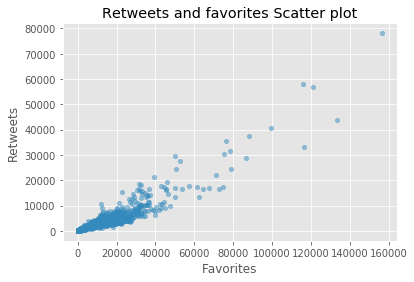

In [8]:
# plot a scatter ployt between favourities and retweets 

df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

### This insight shows that there is a positive correlation between retweets and favorites 

 ### Insight-2

In [26]:
#find the no. of dog stages 

df['prediction_algorithm'].value_counts()

golden_retriever                  158
Labrador_retriever                106
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         50
chow                               48
Pomeranian                         42
Samoyed                            41
malamute                           32
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
French_bulldog                     29
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Siberian_husky                     20
beagle                             20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
basset      

##### So the most popular dog breed is a golden retriever 

##### Let's visualize this

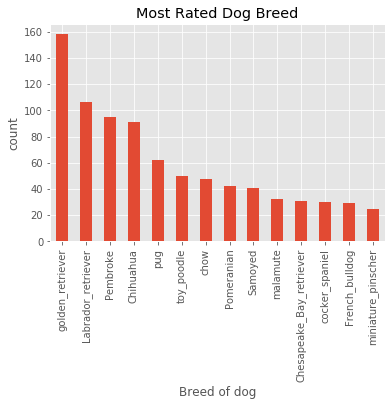

In [14]:

# Histogram to visualize dog breeeds
dog_breed = df.groupby('prediction_algorithm').filter(lambda x: len(x) >= 25)

dog_breed['prediction_algorithm'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Dog Breed')
plt.xlabel('Breed of dog')
plt.ylabel('count');

##### As from the chart we can see that golden retriver is most popular breed

## Insight 3 

In [20]:
# find most common dog names 

df['name'].value_counts()

Charlie     10
Oliver      10
Cooper      10
Penny        9
Lucy         9
Tucker       9
Sadie        8
Winston      8
Toby         7
Daisy        7
Lola         7
Jax          6
Stanley      6
Bella        6
Bo           6
Koda         6
Scout        5
Oscar        5
Milo         5
Leo          5
Chester      5
Rusty        5
Bailey       5
Louis        5
Buddy        5
Dave         5
Jack         4
Gary         4
Phil         4
Finn         4
            ..
Angel        1
Mattie       1
Noosh        1
Duddles      1
Huxley       1
Lilly        1
Gordon       1
Bloop        1
Terrance     1
Ralphson     1
Terrenth     1
Taz          1
Walker       1
Monkey       1
Lambeau      1
Marty        1
Chef         1
Tito         1
Jaycob       1
Fletcher     1
Sprout       1
Maude        1
Shiloh       1
Lucky        1
Peanut       1
Ebby         1
Herschel     1
Emmie        1
Tayzie       1
Vixen        1
Name: name, Length: 909, dtype: int64

###### Let's visualise this

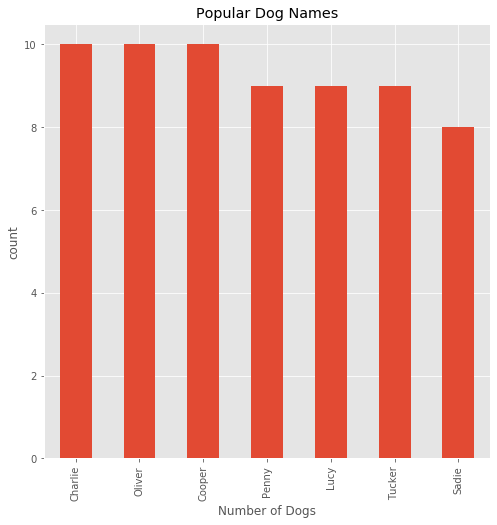

In [19]:
# now we plot a graph to show most common Dog Names 

df.name.value_counts()[0:7].plot('bar', figsize=(8,8), title='Popular Dog Names').set_xlabel("Number of Dogs");
plt.ylabel('count');

###### So, By Graph we can say that most common names is 'Charlie', 'Oliver', 'Cooper' . 

## Insight - 4

In [27]:
#Now we calculate the most favorite dog stage 

df['dog_stage'].value_counts()

None       1680
pupper      212
doggo        62
puppo        23
floofer       8
Name: dog_stage, dtype: int64

###### As we can see here Puuper is the most favorite dog stage 


##### Let's visualise this

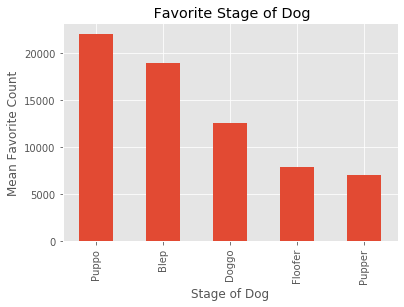

In [25]:

labels = ['Puppo', 'Blep', 'Doggo', 'Floofer', 'Pupper']
fig, ax = plt.subplots()
df.groupby(['dog_stage']).favorites.mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('Stage of Dog')
ax.set_xticklabels(labels)
plt.ylabel('Mean Favorite Count')
plt.title(' Favorite Stage of Dog');

As we can see from the chart **Puppo** is a favorite dog stage followed by **Blep** and **Doggo**

## Insight - 5 

In [30]:
# find no. of male and female dog in dog stage 

df['dog_gender'].value_counts()

male      632
female    223
Name: dog_gender, dtype: int64

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Gender in Stages')

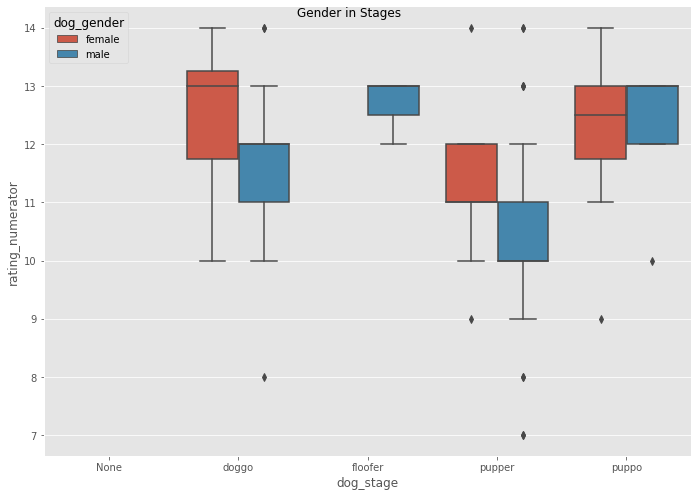

In [44]:
# we plot a grapgh to find which stage has more male and female dogs 

g =sns.factorplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage',
               hue='dog_gender',  
               data=df[df['dog_stage'] != 'None'], 
               size=7,               
               aspect=1.4,   
               legend_out=False)
g.fig.suptitle("Gender in Stages")